# 1: Initialisation

    1. Import Python Packages required to complete this project.
    2. Import 5 Formula data files from csv downloads.
    3. Import 2 Wikipedia pages and convert to DataFrames.

#### Import Python packages

In [1]:
# The required packages are available with this installation of Python 3:

import pandas as pd # Data manipulation and web scraping
import numpy as np # Used for mathematical and type changes
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation

#### Import csv data files

In [2]:
# Import Formula One csv data files. These files were downloaded from http://ergast.com/mrd/

f1_circuits = pd.read_csv('circuits.csv') # Contains circuit and country data
f1_status = pd.read_csv('status.csv') # Contains a status code for retirements etc
f1_drivers = pd.read_csv('drivers.csv') # Contains a list of every driver to have ever driven in Formula One
f1_races = pd.read_csv('races.csv') # Contains data for every race in Formula One
f1_results = pd.read_csv('results.csv') # Contains data for results of every driver in every race in Formula One

#### Import data from Wikipedia pages

In [3]:
# Import "Fatalities" data from Wikipedia

fatalities_table = pd.read_html('https://en.wikipedia.org/wiki/\
List_of_Formula_One_fatalities',
match="Fatalities by driver")

# Import "World Champions" data from Wikipedia

world_champions_table = pd.read_html('https://en.wikipedia.org/wiki/\
List_of_Formula_One_World_Drivers%27_Champions',
match="World Drivers' Champions by season")

In [4]:
# Create new DataFrames from Tables

f1_fatalities = pd.DataFrame(fatalities_table[0])
f1_world_champions = pd.DataFrame(world_champions_table[0]).reset_index()

***

# 2: Inspect and refine each DataFrame

    1. Inspect and refine data for all 5 imported cvs files
    2. Inspect and refine both DataFrames generated from Wikipedia web scrape  

#### 'Circuits' DataFrame

In [5]:
# Inspect and refine "Circuits" DataFrame

f1_circuits.info()
f1_circuits.isnull().sum()

# 76 entries with zero null values
# Remove all columns except 'circuitId', 'name' & 'country'
# Required columns are correct Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   76 non-null     int64  
 1   circuitRef  76 non-null     object 
 2   name        76 non-null     object 
 3   location    76 non-null     object 
 4   country     76 non-null     object 
 5   lat         76 non-null     float64
 6   lng         76 non-null     float64
 7   alt         76 non-null     object 
 8   url         76 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

In [6]:
# Confirm that there are no duplicate vaues in the DataFrame

f1_circuits.duplicated().sum()

0

In [7]:
# Drop all columns except 'circuitId', 'name' & 'country'

cols = [1,3, 5,6,7,8]
f1_circuits.drop(f1_circuits.columns[cols],axis=1,inplace=True)

In [8]:
# Review the scrubbed DataFrame

f1_circuits.head()

,circuitId,name,country
0,1,Albert Park Grand Prix Circuit,Australia
1,2,Sepang International Circuit,Malaysia
2,3,Bahrain International Circuit,Bahrain
3,4,Circuit de Barcelona-Catalunya,Spain
4,5,Istanbul Park,Turkey


#### 'Status' DataFrame

In [9]:
# Inspect 'Status' DataFrame

f1_status.info()
f1_status.isnull().sum()

# 139 entries with zero null values
# All columns are correct Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


statusId    0
status      0
dtype: int64

In [10]:
# Confirm that there are no duplicate vaues in the DataFrame

f1_status.duplicated().sum()

0

In [11]:
# Review the scrubbed DataFrame

f1_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


#### 'Fatalities' DataFrame

In [12]:
# Inspect and refine data

f1_fatalities.info()
f1_fatalities.isnull().sum()

# 52 entries with zero null values
# Remove all columns except Driver' & 'Date of Accident' columns
# Remove trailing data in both 'Driver' & 'Date of Accident' columns
# Required columns are correct Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Driver            52 non-null     object
 1   Date of accident  52 non-null     object
 2   Event             52 non-null     object
 3   Circuit           52 non-null     object
 4   Car               52 non-null     object
 5   Session           52 non-null     object
 6   Ref(s).           52 non-null     object
dtypes: object(7)
memory usage: 3.0+ KB


Driver              0
Date of accident    0
Event               0
Circuit             0
Car                 0
Session             0
Ref(s).             0
dtype: int64

In [13]:
# Confirm that there are no duplicate vaues in the DataFrame

f1_fatalities.duplicated().sum()

0

In [14]:
# Display the first two rows of 'Fatalities' DataFrame

f1_fatalities.head(2)

,Driver,Date of accident,Event,Circuit,Car,Session,Ref(s).
0,Cameron Earl (UK),"June 18, 1952",Test,MIRA,ERA,Test,[15]
1,Chet Miller (USA),"May 15, 1953",Indianapolis 500[note 1],Indianapolis Motor Speedway,Kurtis Kraft,Practice,[17]


In [15]:
# Change 'Date of accident' to Year only. Change in type from object is not required

f1_fatalities_Driver_split = f1_fatalities['Date of accident'].str.split(',', expand=True)

# Insert back into original DataFrame

f1_fatalities['Date of accident'] = f1_fatalities_Driver_split[1]
f1_fatalities["Date of accident"] = f1_fatalities["Date of accident"].astype('int64')

In [16]:
# Remove country data from 'Driver' column

f1_fatalities_Driver_split = f1_fatalities['Driver'].str.split('(', expand=True)

#Insert back into original DataFrame

f1_fatalities['Driver'] = f1_fatalities_Driver_split[0]

In [17]:
# Remove all non F1 race deaths. Retain Only Events that are actual Grand Prix races

f1_fatalities = f1_fatalities[~f1_fatalities['Event'].str.contains('Grand') == False]

In [18]:
# Drop all columns except for 'Driver' and 'Date of Accident'

f1_fatalities.drop(f1_fatalities.loc[:, 'Event':'Ref(s).'].columns, axis=1).reset_index(drop=True)

,Driver,Date of accident
0,Charles de Tornaco,1953
1,Onofre Marimón,1954
2,Mario Alborghetti,1955
3,Luigi Musso,1958
4,Peter Collins,1958
5,Stuart Lewis-Evans,1958
6,Chris Bristow,1960
7,Alan Stacey,1960
8,Wolfgang von Trips,1961
9,Ricardo Rodríguez,1962


#### 'World Champions' DataFrame

In [19]:
# Review header and footer of imported data

f1_world_champions.head(3) 

index   Season                  Driver Age Constructor             Tyres  \
          Season                  Driver Age     Chassis      Engine Tyres   
0     0     1950     Giuseppe Farina[20]  44  Alfa Romeo  Alfa Romeo     P   
1     1     1951  Juan Manuel Fangio[21]  40  Alfa Romeo  Alfa Romeo     P   
2     2  1952[a]      Alberto Ascari[23]  34     Ferrari     Ferrari   F P   

  Poles Wins Podiums Fastest laps Points          % Points Clinched[17]  \
  Poles Wins Podiums Fastest laps Points          % Points Clinched[17]   
0     2    3       3            3     30   83.333 (47.619)  Race 7 of 7   
1     4    3       5            5     31   86.111 (51.389)  Race 8 of 8   
2     5    6       6            6     36  100.000 (74.306)  Race 6 of 8   

  # of racesremaining Margin % Margin  
  # of racesremaining Margin % Margin  
0                   0      3   10.000  
1                   0      6   19.355  
2                   2     12   33.333

In [20]:
f1_world_champions.tail(3)     # last 5 rows

index  Season              Driver  Age  Constructor               Tyres  \
          Season              Driver  Age      Chassis       Engine  Tyres   
73    73    2022  Max Verstappen[55]   25     Red Bull         RBPT      P   
74    74  Season              Driver  Age      Chassis       Engine  Tyres   
75    75  Season              Driver  Age  Constructor  Constructor  Tyres   

    Poles  Wins  Podiums  Fastest laps  Points  % Points   Clinched[17]  \
    Poles  Wins  Podiums  Fastest laps  Points  % Points   Clinched[17]   
73      7    15       17             5     454    76.174  Race 18 of 22   
74  Poles  Wins  Podiums  Fastest laps  Points  % Points       Clinched   
75  Poles  Wins  Podiums  Fastest laps  Points  % Points       Clinched   

    # of racesremaining  Margin  % Margin  
    # of racesremaining  Margin  % Margin  
73                    4     146    32.159  
74  # of racesremaining  Margin  % Margin  
75  # of racesremaining  Margin  % Margin

In [21]:
# Wikipedia page has merged cells in header and footer so lines are duplicated
# To resolve, remove one header row and bottom 2 rows from DataFrame

# Remove duplicate header

f1_world_champions.columns = f1_world_champions.columns.droplevel(-1)

#Drop the last 2 rows 

f1_world_champions = f1_world_champions.iloc[:-2]

In [22]:
# Review header and footer of imported data

f1_world_champions.head(3) 

,index,Season,Driver,Age,Constructor,Constructor,Tyres,Poles,Wins,Podiums,Fastest laps,Points,% Points,Clinched[17],# of racesremaining,Margin,% Margin
0,0,1950,Giuseppe Farina[20],44,Alfa Romeo,Alfa Romeo,P,2,3,3,3,30,83.333 (47.619),Race 7 of 7,0,3,10.000
1,1,1951,Juan Manuel Fangio[21],40,Alfa Romeo,Alfa Romeo,P,4,3,5,5,31,86.111 (51.389),Race 8 of 8,0,6,19.355
2,2,1952[a],Alberto Ascari[23],34,Ferrari,Ferrari,F P,5,6,6,6,36,100.000 (74.306),Race 6 of 8,2,12,33.333


In [23]:
f1_world_champions.tail(3)

,index,Season,Driver,Age,Constructor,Constructor,Tyres,Poles,Wins,Podiums,Fastest laps,Points,% Points,Clinched[17],# of racesremaining,Margin,% Margin
71,71,2020,Lewis Hamilton[51],35,Mercedes,Mercedes,P,10,11,14,6,347,78.507,Race 14 of 17,3,124,35.735
72,72,2021,Max Verstappen[55],24,Red Bull,Honda,P,10,10,18,6,395.5,69.692,Race 22 of 22,0,8,2.023
73,73,2022,Max Verstappen[55],25,Red Bull,RBPT,P,7,15,17,5,454,76.174,Race 18 of 22,4,146,32.159


In [24]:
# Inspect and refine data

f1_world_champions.info()
f1_world_champions.isnull().sum()

# 74 entries with zero null values
# Remove all columns except 'Season' & 'Driver'
# Remove trailing data in both 'Season' & 'Driver' columns
# Required columns are correct Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                74 non-null     int64 
 1   Season               74 non-null     object
 2   Driver               74 non-null     object
 3   Age                  74 non-null     object
 4   Constructor          74 non-null     object
 5   Constructor          74 non-null     object
 6   Tyres                74 non-null     object
 7   Poles                74 non-null     object
 8   Wins                 74 non-null     object
 9   Podiums              74 non-null     object
 10  Fastest laps         74 non-null     object
 11  Points               74 non-null     object
 12  % Points             74 non-null     object
 13  Clinched[17]         74 non-null     object
 14  # of racesremaining  74 non-null     object
 15  Margin               74 non-null     object
 16  % Margin  

index                  0
Season                 0
Driver                 0
Age                    0
Constructor            0
Constructor            0
Tyres                  0
Poles                  0
Wins                   0
Podiums                0
Fastest laps           0
Points                 0
% Points               0
Clinched[17]           0
# of racesremaining    0
Margin                 0
% Margin               0
dtype: int64

In [25]:
# Confirm that there are no duplicate vaues in the DataFrame

f1_world_champions.duplicated().sum()

0

In [26]:
# Remove trailing data from 'Season' & 'Driver' columns

f1_world_champions_split = f1_world_champions['Season'].str.split('[', expand=True)
f1_world_champions['Season'] = f1_world_champions_split[0]
f1_world_champions_split = f1_world_champions['Driver'].str.split('[', expand=True)
f1_world_champions['Driver'] = f1_world_champions_split[0]

In [27]:
# Remove unwanted columns

f1_world_champions.drop(f1_world_champions.loc[:,'Age':'% Margin'].columns, axis=1, inplace=True)

In [28]:
# Groupby DataFrame and save

f1_world_champions=f1_world_champions.groupby([ "Driver"]).size().to_frame(name = 'TimesWorldChampion').reset_index()

In [29]:
# Sort by 'TimesWorldChampion' column descending

f1_world_champions = f1_world_champions.sort_values('TimesWorldChampion', ascending = False).reset_index(drop=True)

In [30]:
# Review the scrubbed DataFrame

f1_world_champions.head()

,Driver,TimesWorldChampion
0,Michael Schumacher,7
1,Lewis Hamilton,7
2,Juan Manuel Fangio,6
3,Alain Prost,4
4,Sebastian Vettel,4


#### 'Drivers' DataFrame 

In [31]:
# Inspect and refine data

f1_drivers.info()
f1_drivers.isnull().sum()

# 855 entries with zero null values
# Remove all columns except 'driverId',  'forename', 'surname' & 'nationality'
# Required columns are correct Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     855 non-null    int64 
 1   driverRef    855 non-null    object
 2   number       855 non-null    object
 3   code         855 non-null    object
 4   forename     855 non-null    object
 5   surname      855 non-null    object
 6   dob          855 non-null    object
 7   nationality  855 non-null    object
 8   url          855 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [32]:
# Confirm that there are no duplicate values in the DataFrame

f1_drivers.duplicated().sum()

0

In [33]:
# Drop all columns except 'driverId',  'forename', 'surname' & 'nationality'

cols = [1,2,3,6,8]
f1_drivers.drop(f1_drivers.columns[cols],axis=1,inplace=True)

In [34]:
# Create 'Full Name' column in DataFrame

f1_drivers["fullname"] = f1_drivers["forename"] + ' ' + f1_drivers["surname"]

In [35]:
# Move 'full name' position to after 'surname''

f1_drivers = f1_drivers.reindex(['driverId', 'forename', 'surname', 'fullname', 'nationality'], axis=1)

In [36]:
# Because the World Champion data is coming from a different source, 
# check to ensure that all World Champions exists in the 'Drivers' dataFrame

f1_name_check = pd.merge(f1_drivers,f1_world_champions, left_on='fullname', right_on='Driver', how='right')

In [37]:
# From right join, check to see if any naming discrepancies exist in 'World Champions' DataFrame

f1_name_check[f1_name_check['fullname'].isna()]

,driverId,forename,surname,fullname,nationality,Driver,TimesWorldChampion
2,NaN,NaN,NaN,NaN,NaN,Juan Manuel Fangio,6
32,NaN,NaN,NaN,NaN,NaN,Giuseppe Farina,1


In [38]:
# Find the impacted rows in the 'Drivers' dataFrame

f1_name_check = f1_drivers[f1_drivers.eval("surname == 'Fangio' or \
                                            surname == 'Farina'")]
print(f1_name_check)

     driverId forename surname     fullname nationality
579       579     Juan  Fangio  Juan Fangio   Argentine
642       642     Nino  Farina  Nino Farina     Italian


In [39]:
 # Change forenames and surnames in the 'Drivers' dataFrame to match 'World Champions'

f1_drivers['forename'] = f1_drivers['forename'].str.replace('Nino','Giuseppe')
f1_drivers['forename'] = f1_drivers['forename'].str.replace('Juan','Juan Manuel')
f1_drivers['fullname'] = f1_drivers['fullname'].str.replace('Nino Farina','Giuseppe Farina')
f1_drivers['fullname'] = f1_drivers['fullname'].str.replace('Juan Fangio','Juan Manuel Fangio')


In [40]:
# Confirm that 'Drivers' dataFrame has been updated correctly

print(f1_drivers.loc[f1_drivers['fullname'].isin(['Juan Manuel Fangio', 'Giuseppe Farina'])])

     driverId     forename surname            fullname nationality
579       579  Juan Manuel  Fangio  Juan Manuel Fangio   Argentine
642       642     Giuseppe  Farina     Giuseppe Farina     Italian


In [41]:
# Ensure all NaN data has been resolved

f1_drivers.isna().sum()

driverId       0
forename       0
surname        0
fullname       0
nationality    0
dtype: int64

In [42]:
# Merge 'Warld Champions' DataFrame into 'Drivers' DataFrame

f1_drivers = pd.merge(f1_drivers,f1_world_champions, left_on='fullname', right_on='Driver', how='outer')

In [43]:
# Remove 'Drivers' columns
f1_drivers.drop(['Driver'], axis=1, inplace=True)

In [44]:
# Inspect f1_drivers post-merge 

f1_drivers.head(3)

# Remove all NaN data
# Change 'TimesWorldChampion' type from float to int

,driverId,forename,surname,fullname,nationality,TimesWorldChampion
0,1,Lewis,Hamilton,Lewis Hamilton,British,7.0
1,2,Nick,Heidfeld,Nick Heidfeld,German,NaN
2,3,Nico,Rosberg,Nico Rosberg,German,1.0


In [45]:
# Replace NULL values with zero

f1_drivers['TimesWorldChampion'] = f1_drivers['TimesWorldChampion'].fillna(0).astype(np.int64)

In [46]:
# Change driverId from float to int

f1_drivers['driverId'] = f1_drivers['driverId'].astype(np.int64)

In [47]:
# Inspect 'Drivers' DtaFrame

f1_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 854
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   driverId            855 non-null    int64 
 1   forename            855 non-null    object
 2   surname             855 non-null    object
 3   fullname            855 non-null    object
 4   nationality         855 non-null    object
 5   TimesWorldChampion  855 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 46.8+ KB


In [48]:
# Review the scrubbed DataFrame

f1_drivers.head()

,driverId,forename,surname,fullname,nationality,TimesWorldChampion
0,1,Lewis,Hamilton,Lewis Hamilton,British,7
1,2,Nick,Heidfeld,Nick Heidfeld,German,0
2,3,Nico,Rosberg,Nico Rosberg,German,1
3,4,Fernando,Alonso,Fernando Alonso,Spanish,2
4,5,Heikki,Kovalainen,Heikki Kovalainen,Finnish,0


#### 'Races' DataFrame

In [49]:
# Merge 'Circuit' DataFrame into 'Races' DataFrame

f1_races = pd.merge(f1_races,f1_circuits,on='circuitId', how='inner', suffixes=('_race', '_circuit'))

In [50]:
# Inspect after Merge and drop unwanted columns

f1_races.info()
f1_races.isnull().sum()

# 1,079 entries with zero null values
# Remove all columns except 'raceId', 'year' & 'country'
# Required columns are correct Data Types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        1079 non-null   int64 
 1   year          1079 non-null   int64 
 2   round         1079 non-null   int64 
 3   circuitId     1079 non-null   int64 
 4   name_race     1079 non-null   object
 5   date          1079 non-null   object
 6   time          1079 non-null   object
 7   url           1079 non-null   object
 8   fp1_date      1079 non-null   object
 9   fp1_time      1079 non-null   object
 10  fp2_date      1079 non-null   object
 11  fp2_time      1079 non-null   object
 12  fp3_date      1079 non-null   object
 13  fp3_time      1079 non-null   object
 14  quali_date    1079 non-null   object
 15  quali_time    1079 non-null   object
 16  sprint_date   1079 non-null   object
 17  sprint_time   1079 non-null   object
 18  name_circuit  1079 non-null   object
 19  countr

raceId          0
year            0
round           0
circuitId       0
name_race       0
date            0
time            0
url             0
fp1_date        0
fp1_time        0
fp2_date        0
fp2_time        0
fp3_date        0
fp3_time        0
quali_date      0
quali_time      0
sprint_date     0
sprint_time     0
name_circuit    0
country         0
dtype: int64

In [51]:
# Confirm that there are no duplicate vaues in the DataFrame

f1_races.duplicated().sum()

0

In [52]:
# Drop all columns except 'raceId', 'year' & 'country'

f1_races.drop(f1_races.loc[:, 'round':'name_circuit'].columns, axis=1, inplace=True)

In [53]:
# Review the scrubbed DataFrame

f1_races.head()

,raceId,year,country
0,1,2009,Australia
1,18,2008,Australia
2,36,2007,Australia
3,55,2006,Australia
4,71,2005,Australia


#### 'Results' DataFrame

In [54]:
# Inspect and refine data

f1_results.info()
f1_results.isnull().sum()

# Inspect "Results" DataFrame
# 25,840 entries with zero null values
# Remove all columns except 'raceId', 'driverId', 'positionText'  
# 'positionOrder', 'fastestLapSpeed' & 'statusId'
# Required columns are correct Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [55]:
# Confirm that there are no duplicate vaues in the DataFrame

f1_results.duplicated().sum()

0

In [56]:
# Merge 'Status' DataFrame into 'Results' DataFrame

f1_results = pd.merge(f1_results,f1_status,on='statusId', how='inner')

In [57]:
# Merge 'Drivers' DataFrame into 'Results' DataFrame

f1_results = pd.merge(f1_results,f1_drivers,on='driverId', how='inner')

In [58]:
# Merge 'Races' DataFrame into 'Results' DataFrame

f1_results = pd.merge(f1_results,f1_races,on='raceId', how='inner')

In [59]:
# Inspect 'Results' DataFrame

f1_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25840 entries, 0 to 25839
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   resultId            25840 non-null  int64  
 1   raceId              25840 non-null  int64  
 2   driverId            25840 non-null  int64  
 3   constructorId       25840 non-null  int64  
 4   number              25840 non-null  object 
 5   grid                25840 non-null  int64  
 6   position            25840 non-null  object 
 7   positionText        25840 non-null  object 
 8   positionOrder       25840 non-null  int64  
 9   points              25840 non-null  float64
 10  laps                25840 non-null  int64  
 11  time                25840 non-null  object 
 12  milliseconds        25840 non-null  object 
 13  fastestLap          25840 non-null  object 
 14  rank                25840 non-null  object 
 15  fastestLapTime      25840 non-null  object 
 16  fast

In [60]:
# Drop all columns except 'positionText', 'positionOrder', 'laps', 'fullname', 'nationality' & 'year'

cols = [0,1,2,3,4,5,6,9,11,12,13,14,15,16,17,19,20,23,25]
f1_results.drop(f1_results.columns[cols],axis=1,inplace=True)

In [61]:
# Review the scrubbed DataFrame

f1_results.head()

,positionText,positionOrder,laps,status,fullname,nationality,year
0,1,1,58,Finished,Lewis Hamilton,British,2008
1,2,2,58,Finished,Nick Heidfeld,German,2008
2,3,3,58,Finished,Nico Rosberg,German,2008
3,4,4,58,Finished,Fernando Alonso,Spanish,2008
4,5,5,58,Finished,Heikki Kovalainen,Finnish,2008


***

# Visualisation of Data

    1. Number of races per year
    2. Number of retirements per decade
    3. Top 5 World Champions versus all other World Champions
    4. Number of accidents per decade
    5. Number of fatalities per decade
    6. Best conversion rate of races for wins

#### 1. Number of Formula One races per year

This visualisation is intended to show the growth of Formula One since 1950. 

In [62]:
# Group by number of races per year

f1_numberofraces = f1_races.groupby(["year"]).size().to_frame(name = 'NumberOfRaces').reset_index()

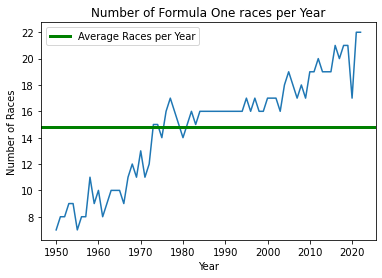

In [63]:
# Plot a line graph

plt.plot(f1_numberofraces["year"], f1_numberofraces["NumberOfRaces"])
plt.axhline(y = np.nanmean(f1_numberofraces.NumberOfRaces),color='green',linewidth=3,label='Average Races per Year')

# Add plot title

plt.title("Number of Formula One races per Year")

# Add axis labels

plt.xlabel("Year")
plt.ylabel("Number of Races")

# Add legend label

plt.legend(loc='best')

# Save as png file

plt.savefig('number_races_per_year.png', dpi=300, bbox_inches='tight', facecolor='white', transparent=False)


In [64]:
# Display every couuntry that hosted a Formula One race in 1950

print(f1_races[f1_races["year"] == 1950][["country"]])

          country
167        Monaco
231            UK
370       Belgium
442         Italy
671           USA
1020       France
1042  Switzerland


In [65]:
# Display every couuntry that hosted a Formula One race in 2022

print(f1_races[f1_races["year"] == 2022][["country"]])

           country
24       Australia
77         Bahrain
110          Spain
178         Monaco
244             UK
322        Hungary
382        Belgium
454          Italy
467      Singapore
499          Japan
538         Brazil
552            UAE
593         Canada
701          Italy
737        Austria
833         Mexico
854         France
921    Netherlands
1057           USA
1071    Azerbaijan
1077  Saudi Arabia
1078           USA


#### 2. Number of Formula One retirements per decade

This visualisation is intended to show the number of race retirements in Formula One from the 1980's onwards.

In [66]:
# Create 'Retirements' DataFrame from 'Results' 

f1_retirements = f1_results[f1_results.eval("positionText == 'R' & \
                                            status != 'Accident' & \
                                            status != 'Collision' & \
                                            status != 'Collision damage' & \
                                            status != 'Spun off' & \
                                            status != 'Suspension' & \
                                            status != 'Withdrew'")]

In [67]:
# Groupby 'Retirements' DataFrame and save

f1_retirements = f1_retirements.groupby(["year"]).size().to_frame(name = 'NumberOfRetirements').reset_index()

In [68]:
# As the sample is only 3 seasons, drop 2020 season onwards

f1_retirements = f1_retirements[f1_retirements.eval("year >= 1980 & year <= 2019")].reset_index()  

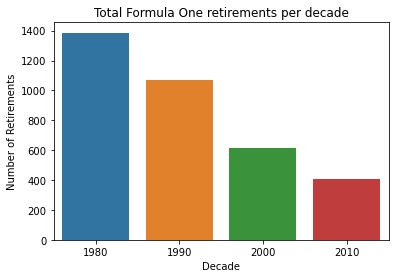

In [69]:
# Plot a bar graph

f1_retirements['year'] = f1_retirements['year'] - f1_retirements['year'] % 10
df_decade = (f1_retirements.groupby(['year']).sum().reset_index())
ax = sns.barplot(x="year", y="NumberOfRetirements", data=df_decade)

# Add plot title

plt.title('Total Formula One retirements per decade')

# Add axis labels

plt.xlabel('Decade')
plt.ylabel('Number of Retirements')

# Save as png file

plt.savefig('retirements_per_decade.png', dpi=300, bbox_inches='tight', facecolor='white', transparent=False)


#### 3. Top 5 World Champions versus all other World Champions 

This visualisation is intended to show whether the spread of World Champions across the universe of winners is even, or whether there is a small group of drivers who have dominated the number of World Championships.

In [70]:
# Firstly, we can check to see how many drivers, if any, have won more than 3 World Championships. 
# The number of drivers is 5

for i in range(len(f1_world_champions)):
    if f1_world_champions.loc[i, "TimesWorldChampion"] >= 4:
        print(f1_world_champions.loc[i])

Driver                Michael Schumacher
TimesWorldChampion                     7
Name: 0, dtype: object
Driver                Lewis Hamilton
TimesWorldChampion                 7
Name: 1, dtype: object
Driver                Juan Manuel Fangio
TimesWorldChampion                     6
Name: 2, dtype: object
Driver                Alain Prost
TimesWorldChampion              4
Name: 3, dtype: object
Driver                Sebastian Vettel
TimesWorldChampion                   4
Name: 4, dtype: object


In [71]:
# Compare the top 5 drivers together against the rest of the World Champions
  
# initialise list of lists

f1_world_champions_top_5 = [['top 5 drivers', (f1_world_champions['TimesWorldChampion'][:5].sum())], ['rest of drivers', (f1_world_champions['TimesWorldChampion'][5:].sum())]]
  
# Create the pandas DataFrame

f1_world_champions_top_5 = pd.DataFrame(f1_world_champions_top_5, columns=['DriversGrouped', 'NumberOfChampionships'])
  
# print dataframe

f1_world_champions_top_5

,DriversGrouped,NumberOfChampionships
0,top 5 drivers,28
1,rest of drivers,46


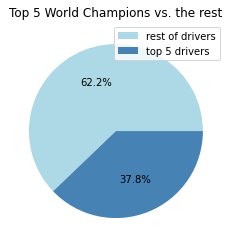

In [72]:
# Create a pie chart

f1_world_champions_top_5.groupby(['DriversGrouped']).sum().plot(
    kind='pie', y='NumberOfChampionships', ylabel = '', autopct='%0.1f%%', colors = ['lightblue', 'steelblue'], labeldistance=None, title='Top 5 World Champions vs. the rest', shadow=False)

# Save as png file

plt.savefig('top_5_world_champions.png', dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

In [73]:
# Display total number of drivers in the history of Formula One

f1_drivers.shape

(855, 6)

In [74]:
# Display how many single World Champions there are

f1_world_champions[f1_world_champions["TimesWorldChampion"]==1].count()

Driver                17
TimesWorldChampion    17
dtype: int64

#### 4. Number of Formula One accidents per Decade

This visualisation is intended to plot the number of accidents in Formula One per decade. 

In [75]:
# Within 'Results' DataFrame, return only retirements
# that can be attributed to either Accident or Collision only.
# Remove all records after 2019 as there is only 3 year's 
# worth of data in the current decade

f1_accidents = f1_results[f1_results.eval("positionText == 'R' & \
                                            year <= 2019 & \
                                            (status == 'Accident' or \
                                            status == 'Collision')")].reset_index()                         

In [76]:
# Group by number of accidents per year

f1_accidents = f1_accidents.groupby(["year"]).size().to_frame(name = 'NumberOfAccidents').reset_index()

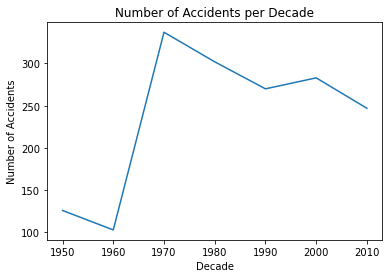

In [77]:
# Plot a line graph

f1_accidents['year'] = f1_accidents['year'] - f1_accidents['year'] % 10
df_decade = (f1_accidents.groupby(['year']).sum().reset_index())
ax = sns.lineplot(x="year", y="NumberOfAccidents", data=df_decade)

# Add plot title

plt.title("Number of Accidents per Decade")

# Add axis labels

plt.xlabel("Decade")
plt.ylabel("Number of Accidents")

# Save as png file

plt.savefig('accidents_per_decade.png', dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

#### 5. Number of Formula One fatalities per Decade

This visualisation is intended to plot the number of fatalities in Formula One per decade. 

In [78]:
# Group by number of fatalities per year

f1_fatalities = f1_fatalities.groupby(["Date of accident"]).size().to_frame(name = 'NumberOfFatalities').reset_index()

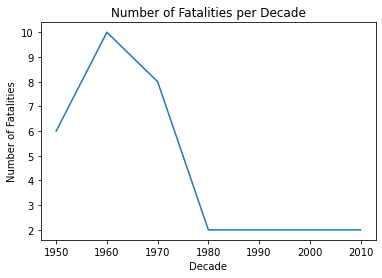

In [79]:
# Plot a line graph showing the 'Fatalities' DataFrame per decade

f1_fatalities['Date of accident'] = f1_fatalities['Date of accident'] - f1_fatalities['Date of accident'] % 10
df_decade = (f1_fatalities.groupby(['Date of accident']).sum().reset_index())
ax = sns.lineplot(x="Date of accident", y="NumberOfFatalities", data=df_decade)

# Add plot title

plt.title("Number of Fatalities per Decade")

# Add axis label

plt.xlabel("Decade")
plt.ylabel("Number of Fatalities")

# Save as png file

plt.savefig('fatalities_per_decade.png', dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

#### 6. Best conversion rate of races for wins in Formula One

This visualisation is intended to plot the number of converted wins from races per driver

In [80]:
# Create 'Experience' DataFrame from 'Results' with all drivers

f1_experience = f1_results.groupby(['fullname']).size().to_frame(name = 'NumberOfRaces').reset_index()
f1_experience.sort_values('NumberOfRaces', ascending=False)

,fullname,NumberOfRaces
256,Fernando Alonso,358
501,Kimi Räikkönen,352
748,Rubens Barrichello,326
522,Lewis Hamilton,310
410,Jenson Button,309
...,...,...
436,Joe Fry,1
431,Jo Vonlanthen,1
1,Adolfo Cruz,1
426,Jimmy Stewart,1


In [81]:
# Create 'Individual Wins' DataFrame from 'Results' with all race winners. look at only race wins

f1_individual_wins = f1_results[f1_results.eval("positionOrder == 1")].reset_index()

# Group by full name to give number of wins per driver

f1_individual_wins = f1_individual_wins.groupby(['fullname']).size().to_frame(name = 'positionOrder').reset_index()

# Rename the new column and sort

f1_individual_wins = f1_individual_wins.rename(columns = {'positionOrder':'NumberOfWins'}, inplace = False)
f1_individual_wins.sort_values('NumberOfWins', ascending=False)

,fullname,NumberOfWins
66,Lewis Hamilton,103
75,Michael Schumacher,91
104,Sebastian Vettel,53
0,Alain Prost,51
4,Ayrton Senna,41
...,...,...
34,Heikki Kovalainen,1
90,Peter Gethin,1
58,Johnnie Parsons,1
36,Innes Ireland,1


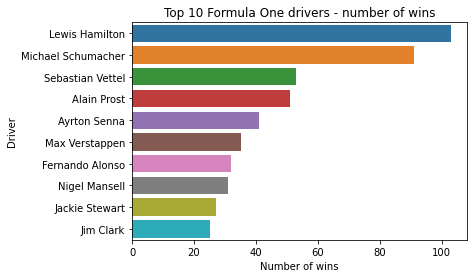

In [82]:
# Plot the top 10 drivers who have the most wins in Formula One

sns.barplot(
    x = 'NumberOfWins',
    y = 'fullname',
    data=f1_individual_wins.nlargest(10, 'NumberOfWins')
)

# Add plot title

plt.title('Top 10 Formula One drivers - number of wins')

# Add axis labels

plt.xlabel('Number of wins')
plt.ylabel('Driver')

# Save as png file

plt.savefig('number_wins_per_driver.png', dpi=300, bbox_inches='tight', facecolor='white', transparent=False)

In [83]:
# Create 'Conversion Rate' DataFrame from 'Experience' and 'Individual Wins'

f1_conversion_rate = pd.merge(f1_experience,f1_individual_wins, on = 'fullname', how='inner').reset_index(drop=True)

In [84]:
# Check the new DataFrame

f1_conversion_rate.head(3)

,fullname,NumberOfRaces,NumberOfWins
0,Alain Prost,202,51
1,Alan Jones,117,12
2,Alberto Ascari,36,13


In [85]:
# Add a new Percentage column

f1_conversion_rate['Percent'] = ((f1_conversion_rate.NumberOfWins / f1_conversion_rate.NumberOfRaces)*100).reset_index(drop=True)
f1_conversion_rate.sort_values('Percent', ascending=False, inplace=True)

In [86]:
# Qualifier of minimum 20 races

f1_conversion_rate = f1_conversion_rate[~(f1_conversion_rate['NumberOfWins'] <= 20)].reset_index(drop=True)

In [87]:
# Drop all drivers except the 10 with highest percentage of win conversions

f1_conversion_rate = f1_conversion_rate.iloc[:10]

In [88]:
# Sort 'Percent' column

f1_conversion_rate.sort_values('Percent', ascending=True, inplace=True)

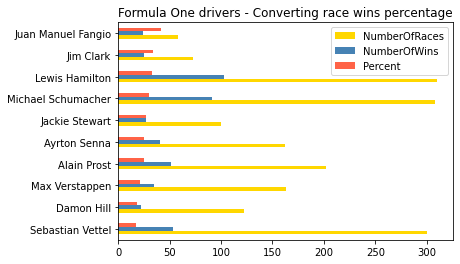

In [89]:
# plotting stacked Horizontal Bar Chart with all the columns

f1_conversion_rate.plot.barh(x='fullname', xlabel = '', ylabel = '', title= 'Formula One drivers - Converting race wins percentage', color=("gold", "steelblue", 'tomato'))

# Save as png file

plt.savefig('conversion_rate.png', dpi=300, bbox_inches='tight', facecolor='white', transparent=False)